# Machine learning 24 : K-Nearest Neighbors (KNN) Regressor  

### 1. What Is KNN Regression?

KNN Regression is a **non-parametric**, **instance-based** learning method used for predicting continuous outcomes. Unlike models that learn a function during training, KNN simply stores the training data and makes predictions based on the similarity between data points.

### 2. Core Idea

- To predict the output for a new data point, KNN:
  1. **Calculates the distance** between the new point and all points in the training set.
  2. **Selects the K closest points** (neighbors).
  3. **Averages their target values** to produce the prediction.

### 3. Distance Metrics

Common ways to measure "closeness" include:

- **Euclidean distance**:  
  $$d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$  
  Most commonly used for continuous features.

- **Manhattan distance**:  
  $$d(x, y) = \sum_{i=1}^{n}|x_i - y_i|$$  
  Useful when dealing with high-dimensional data.

- **Minkowski distance**: A generalization that includes both Euclidean and Manhattan.

### 4. Choosing K

- **Small K** (e.g., 1 or 2):  
  - More sensitive to noise.
  - Can lead to overfitting.

- **Large K**:  
  - Smoother predictions.
  - Risk of underfitting if too large.

A good K is often found via cross-validation.

### 5. Prediction Formula

If \( x \) is the new input and \( N_k(x) \) is the set of its K nearest neighbors, then:

$$
\hat{y}(x) = \frac{1}{K} \sum_{x_i \in N_k(x)} y_i
$$

Where \( y_i \) are the target values of the neighbors.

### 6. Characteristics

- **Lazy learning**: No training phase; all computation happens during prediction.
- **No assumptions** about the underlying data distribution.
- **Sensitive to feature scaling**: Features should be normalized or standardized.

### 🧪 Pros and Cons

| ✅ Pros                          | ❌ Cons                              |
|----------------------------------|--------------------------------------|
| Simple to understand and implement | Slow prediction time for large datasets |
| No training phase                | Sensitive to irrelevant features     |
| Works well with small datasets   | Requires careful choice of K and distance metric |

In [1]:
# Example of KNN classfier on IRIS data using SNS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# split the data into X and y
X = tips.drop('tip', axis=1)
y = tips['tip']

In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
# encode the categorical columns using for lopp and le
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])

In [7]:
# train test split the data and run the model
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [9]:
# import the model and fit the data
from sklearn.neighbors import KNeighborsRegressor


In [10]:
# create the model
model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)

In [11]:
# fit the model on the training data
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
# predict the species for the test data
y_pred = model.predict(X_test)

In [13]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error: 0.8382265306122448
R2 Score: 0.3294034029001649
RMSE: 0.9155471209130881


In [15]:
X_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [16]:
# predict a specific value
model.predict([[13, 0, 1, 3, 1, 2]])

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([1.898])

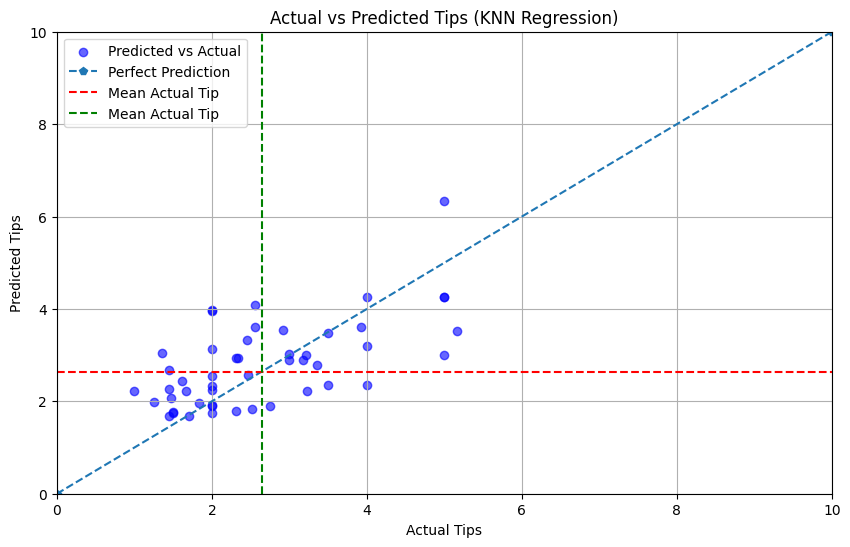

In [17]:
# Assuming y_test and y_pred are defined from your KNN regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([0, 10], [0, 10], '--p', label='Perfect Prediction')  # Diagonal line for reference

# Use mean of y_test for horizontal and vertical lines
mean_tip = np.mean(y_test)
plt.axhline(y=mean_tip, color='r', linestyle='--', label='Mean Actual Tip')
plt.axvline(x=mean_tip, color='g', linestyle='--', label='Mean Actual Tip')

plt.grid(True)
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs Predicted Tips (KNN Regression)')
plt.show()
